In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pyqg

In [2]:
#now to try to run the three layer model(proper PYQG)
from pyqg import diagnostic_tools as tools
#this sets up the layers
L =  1000.e3     # length scale of box    [m]
Ld = 15.e3       # deformation scale      [m]
kd = 1./Ld       # deformation wavenumber [m^-1]
Nx = 64          # number of grid points

H1 = 50.        # layer 1 thickness  [m]
H2 = 1450.       # layer 2
H3 = 3500.       # layer 3

U1 = 0.05          # layer 1 zonal velocity [m/s]
U2 = 0.025         # layer 2
U3 = 0.00          # layer 3

rho1 = 1024.
rho2 = 1027.2
rho3 = 1028.

rek = 1.e-7       # linear bottom drag coeff.  [s^-1]
f0  = 0.0001236812857687059 # coriolis param [s^-1]
beta = 1.2130692965249345e-11 # planetary vorticity gradient [m^-1 s^-1]

Ti = Ld/(abs(U1))  # estimate of most unstable e-folding time scale [s]
dt = Ti/200.   # time-step [s]
tmax = 300*Ti      # simulation time [s]


In [3]:
#this defines the model from all of the set-up parameters above
m = pyqg.LayeredModel(nx=Nx, nz=3, U = [U1,U2,U3],V = [0.,0.,0.],L=L,f=f0,beta=beta,
                         H = [H1,H2,H3], rho=[rho1,rho2,rho3],rek=rek,
                        dt=dt,tmax=tmax, twrite=5000, tavestart=Ti*10)

INFO:  Logger initialized


In [4]:
#this sets up the initial conditions for the model
#in the original code, delta is not specified 
#delta = 0.5
sig = 1.e-7
qi = sig*np.vstack([np.random.randn(m.nx,m.ny)[np.newaxis,],
                    np.random.randn(m.nx,m.ny)[np.newaxis,],
                    np.random.randn(m.nx,m.ny)[np.newaxis,]])
m.set_q(qi)

In [5]:
#now, we run the model 
m.run()

INFO: Step: 5000, Time: 7.50e+06, KE: 2.99e-07, CFL: 0.005
INFO: Step: 10000, Time: 1.50e+07, KE: 3.71e-07, CFL: 0.005
INFO: Step: 15000, Time: 2.25e+07, KE: 6.80e-07, CFL: 0.005
INFO: Step: 20000, Time: 3.00e+07, KE: 1.53e-06, CFL: 0.006
INFO: Step: 25000, Time: 3.75e+07, KE: 3.82e-06, CFL: 0.006
INFO: Step: 30000, Time: 4.50e+07, KE: 1.01e-05, CFL: 0.006
INFO: Step: 35000, Time: 5.25e+07, KE: 2.66e-05, CFL: 0.008
INFO: Step: 40000, Time: 6.00e+07, KE: 6.73e-05, CFL: 0.010
INFO: Step: 45000, Time: 6.75e+07, KE: 1.57e-04, CFL: 0.016
INFO: Step: 50000, Time: 7.50e+07, KE: 2.99e-04, CFL: 0.020
INFO: Step: 55000, Time: 8.25e+07, KE: 3.68e-04, CFL: 0.026
INFO: Step: 60000, Time: 9.00e+07, KE: 3.62e-04, CFL: 0.025


/mnt/local/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """
/mnt/local/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':
/mnt/local/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either

Text(0.5, 1.0, 'Layer 3 PV')

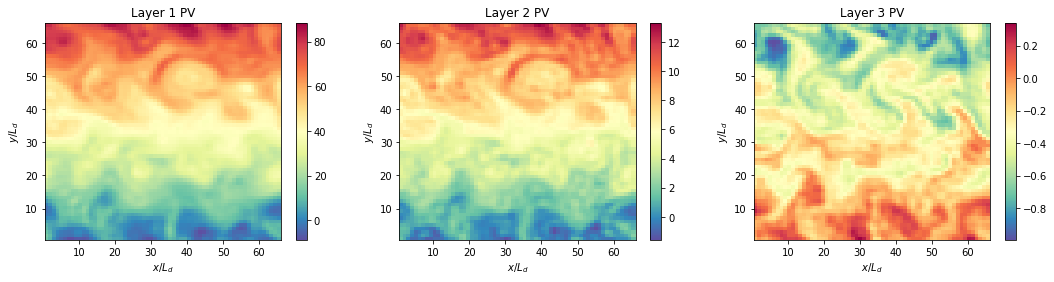

In [6]:
#now this visualizes the results
plt.figure(figsize=(18,4))

plt.subplot(131)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[0,]+m.Qy[0]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 1 PV')

plt.subplot(132)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[1,]+m.Qy[1]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 2 PV')

plt.subplot(133)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[2,]+m.Qy[2]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 3 PV')

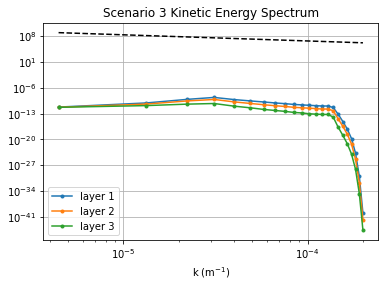

In [29]:
kr, kespec_1 = tools.calc_ispec(m,m.get_diagnostic('KEspec')[0])
_, kespec_2 = tools.calc_ispec(m,m.get_diagnostic('KEspec')[1])
_, kespec_3 = tools.calc_ispec(m,m.get_diagnostic('KEspec')[2])

y = kr**(-5/3) + 1e-6 
#y2 = y - 10

plt.loglog( kr, kespec_1, '.-' )
plt.loglog( kr, kespec_2, '.-' )
plt.loglog( kr, kespec_3, '.-' )
plt.loglog( kr, y, '--k',label ="k^-5/3")
#the line above is meant to add a line: y = k^(-5/3) + 10^(-8)

plt.legend(['layer 1','layer 2', 'layer 3'], loc='lower left')
#plt.ylim([1e-14,1e-6]); plt.xlim([m.kk.min(), m.kk.max()])
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Scenario 3 Kinetic Energy Spectrum');

In [9]:
kr

array([4.44288294e-06, 1.33286488e-05, 2.22144147e-05, 3.11001806e-05,
       3.99859464e-05, 4.88717123e-05, 5.77574782e-05, 6.66432441e-05,
       7.55290099e-05, 8.44147758e-05, 9.33005417e-05, 1.02186308e-04,
       1.11072073e-04, 1.19957839e-04, 1.28843605e-04, 1.37729371e-04,
       1.46615137e-04, 1.55500903e-04, 1.64386669e-04, 1.73272435e-04,
       1.82158200e-04, 1.91043966e-04, 1.99929732e-04])

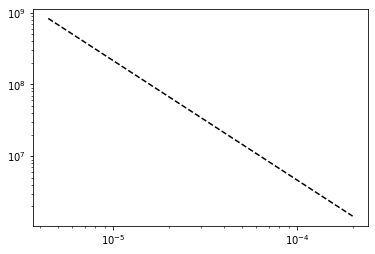

In [20]:
y = (kr**(-5/3) + (10**(-6)))
plt.loglog( kr, y, '--k',label ="k^-5/3")
#the line above is meant to add a line: y = k^(-5/3) + 10^(-8)


In [30]:
m.__dict__

{'g': 9.81,
 'beta': 1.2130692965249345e-11,
 'rd': 15000.0,
 'delta': None,
 'Vbg': array([0., 0., 0.]),
 'Hi': array([  50., 1450., 3500.]),
 'rhoi': array([1024. , 1027.2, 1028. ]),
 'L': 1000000.0,
 'W': 1000000.0,
 'twrite': 5000,
 'tmax': 90000000.0,
 'tavestart': 3000000.0,
 'taveint': 86400.0,
 'logfile': None,
 'log_level': 1,
 'useAB2': False,
 'ntd': 1,
 'filterfac': 23.6,
 'f': 0.0001236812857687059,
 'f2': 1.5297060449400292e-08,
 'logger': <Logger pyqg.model (DEBUG)>,
 'x': array([[  7812.5,  23437.5,  39062.5, ..., 960937.5, 976562.5, 992187.5],
        [  7812.5,  23437.5,  39062.5, ..., 960937.5, 976562.5, 992187.5],
        [  7812.5,  23437.5,  39062.5, ..., 960937.5, 976562.5, 992187.5],
        ...,
        [  7812.5,  23437.5,  39062.5, ..., 960937.5, 976562.5, 992187.5],
        [  7812.5,  23437.5,  39062.5, ..., 960937.5, 976562.5, 992187.5],
        [  7812.5,  23437.5,  39062.5, ..., 960937.5, 976562.5, 992187.5]]),
 'y': array([[  7812.5,   7812.5,   7812.5,